c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
c:\Users\telukkari\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


Preview of the data:
                                  LINK_ID  LINK_MMLID SEGM_ID  KUNTAKOODI  \
0  43b46e6e-e09a-44c0-8f61-74fc1821264d:2  1651652892   109_0         109   
1  6f6aec73-f026-4217-9eb1-17c69a790764:1  2143592662   109_1         109   
2  3e2ce3a5-74ab-47de-8071-805e74a02c94:1  1163913164   109_2         109   
3  3e2ce3a5-74ab-47de-8071-805e74a02c94:1  1163913164   109_3         109   
4  3e2ce3a5-74ab-47de-8071-805e74a02c94:1  1163913164   109_4         109   

   HALLINN_LK  TOIMINN_LK  LINKKITYYP  TIENUMERO  TIEOSANRO  SILTA_ALIK  ...  \
0           1           9          13    31758.0        9.0           0  ...   
1           1           4           3    13693.0        1.0           0  ...   
2           1           2           6    23512.0       16.0           0  ...   
3           1           2           6    23512.0       16.0           0  ...   
4           1           2           6    23512.0       16.0           0  ...   

   SIJ_TARK  KOR_TARK  ALKU_PAALU  

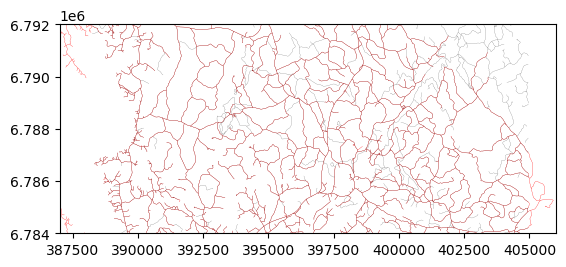

In [11]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt 

# --- Step 1: Read the shapefile ---
# Replace this with your actual file path
# shapefile_path = r"C:\Users\telukkari\Downloads\KANTA-HAME\KANTA-HAME\DR_LINKKI_K.shp"
shapefile_path = r"C:\Users\telukkari\Documents\Data\tieverkosto_kanta_hame\KANTA-HAME\DR_LINKKI_K.shp"
shapefile_path_private = r"C:\Users\telukkari\Documents\Data\tieverkosto_kanta_hame\KANTA-HAME\DR_TIEKUNNALLISET_YKSITYISTIET_K.shp"
shapefile_path_evo = r"C:\Users\telukkari\Documents\Data\evo_tiet\Evo_tiet.shp"
shapefile_path_evo_vayla = r"C:\Users\telukkari\Documents\Data\evo_vayla\tiestotiedot_tieosoiteverkko\tieosoiteverkkoLine.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)
gdf_private = gpd.read_file(shapefile_path_private)
gdf_evo = gpd.read_file(shapefile_path_evo)
gdf_evo_vayla = gpd.read_file(shapefile_path_evo_vayla)
# --- Step 2: Explore basic information ---

# Print the first few rows to get a quick look at the data
print("Preview of the data:")
print(gdf.head(), "\n")

# List all columns (attributes)
print("Attribute columns:")
print(gdf.columns.tolist(), "\n")

# Display data types of each column
print("Data types of attributes:")
print(gdf.dtypes, "\n")

# Check the geometry type (Point, Polygon, LineString, etc.)
print("Geometry types present:")
print(gdf.geom_type.value_counts(), "\n")

# Create a base plot
# ax = gdf.plot(edgecolor='black', figsize=(8, 6), linewidth=0.5,)

# Plot the second layer on the same axes
# gdf_private.plot(ax=ax, edgecolor='red', linewidth=0.1,)
ax = gdf.plot( edgecolor='red', linewidth=0.2,)
gdf_evo.plot(ax = ax, edgecolor='black', linewidth=0.1,)

print(f"Unique tieluokat: {gdf['MTK_TIE_LK'].unique()}") # kanta-häme [12154 12122 12121 12131 12314 12141 12112 12316 12132 12111 0 12153 12155]
# print(f"Unique tieluokat: {gdf['kohdeluokk'].unique()}") # evo shp [12313 12316 12122 12121 12141 12132 12131]

ax.set_xlim([387000, 406000])
ax.set_ylim([6784000, 6792000])
# Show the plot
plt.show()


In [23]:
import geopandas as gpd

# Spatial join: keep only gdf_private geometries that intersect gdf
joined = gpd.sjoin(gdf_private, gdf, predicate='within', how='left')

# Features that are contained will have non-null join results
contained = joined[~joined['index_right'].isna()]

print(f"{len(contained)} of {len(gdf_private)} private geometries are contained in gdf.")


14711 of 14711 private geometries are contained in gdf.
